In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def coef_calculation (X, Y):
    
    n = np.size(X)
    # taking the mean values of each array
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    
    #calculating regression coefficients
    b_1 = (np.sum(X*Y) - n * x_bar * y_bar) / (np.sum(X*X) - n * x_bar * x_bar)
    b_0 = y_bar - b_1 * x_bar
    
    E_i = Y - (b_0 + b_1 * X)
    SSE = (1 / 2 * n) * np.sum(E_i * E_i)
    print ("SSE = " + str(SSE))
    
    return (b_0, b_1)

In [39]:
def adjust(Y_nominal):
    
    #CPI per year (january value)
    CPI = np.array([57.73729, 62.64044, 67.26002, 72.23341, 76.70288, 80.86822,
                    84.55834, 88.54252, 93.85245, 100.58933, 102.70133, 106.19253,
                   109.95503, 112.14896, 114.53678, 118.91290, 127.77754, 134.76594,
                   139.72469])
    
    Y_real = []
    #adjusting values to inflation
    for k in range(0, len(Y_nominal)):
        Y_real.append((93.85245 / CPI[k]) * Y_nominal[k])

    return (Y_real)

In [40]:
def plot_regression_line(X, Y, B):
    
    plt.scatter(X,Y, color = "G")
    
    Y_real = adjust(Y)
    plt.scatter(X,Y_real, color = 'R')
    
    #function obtained by regression
    H = B[0] + B[1] * X
    
    plt.plot(X,H)
    
    #plot parameters 
    plt.text(2012, 410000, "adjusted wage", fontsize=12)
    plt.text(2008, 700000, "un-adjusted wage", fontsize=12)
    plt.title("Minimum wage in Colombia 2000-2018")
    plt.xlabel("year")
    plt.xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
    plt.ylabel("minimum wage (COP)")
    plt.show()

SSE = 34305233832.985077


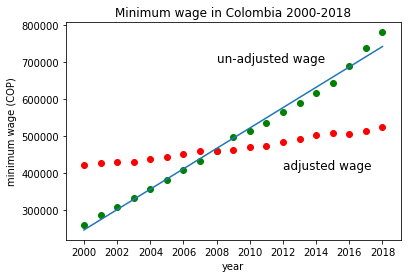

In [41]:
def main():
    
    #dataset: Colombia's minimum wage (in COP) from 2000 to 2018 
    X = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
         2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
    Y = np.array([260100, 286000, 309000, 332000, 358000, 381500, 408000, 433700,
        461500, 496900, 515000, 535600, 566700, 589000, 616000, 644350, 689455,
        737717, 781242])
    
    B = coef_calculation(X, Y)
    plot_regression_line(X, Y, B)
    
#to call the main function first
if __name__ == "__main__":
    main()